# Data visualization with Seaborn

<img src="https://github.com/dfbarrero/dataCourse/raw/master/dataviz/figs/seaborn.png" width="300">


## Introduction

Seaborn is a modern data-visualization Python package

- Based on matplotlib ... and it uses matplotlib, indeed
- Pandas-aware
- Highlevel
- Advancedvisualizations
- Easy to use
    
Still under development! API is changing

**Most of this notebook requires Seaborn v >= 0.9.0**

**Warnings appear with Seaborn 0.12.0**

In [1]:
# Disable warnings

import warnings
warnings.filterwarnings('ignore')

## Initial setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)

0.12.1


Graphical device must by initialized to avoid unexpected behavior. Two modes:
- inline: static
- notebook: interactive, only for browser-based devices

<IPython.core.display.Javascript object>


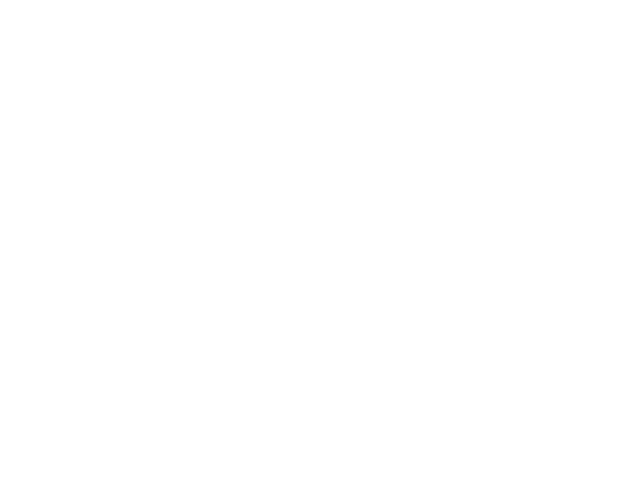

In [3]:
%matplotlib notebook

sns.distplot(np.random.lognormal(10, 1, 100));

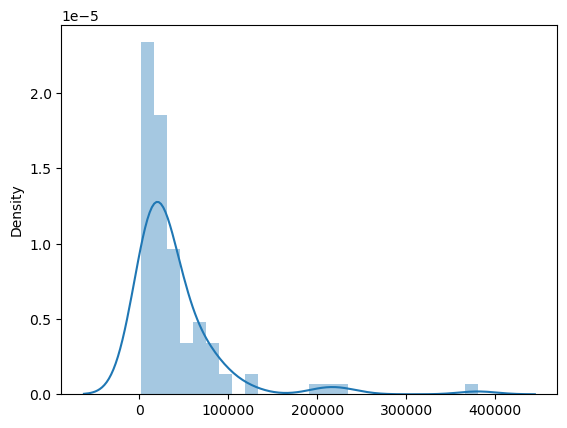

In [4]:
%matplotlib inline

sns.distplot(np.random.lognormal(10, 1, 100));

## Seaborn typical usage

1. Prepare data
2. Set up aesthetics
3. Plot
4. Customize the plot

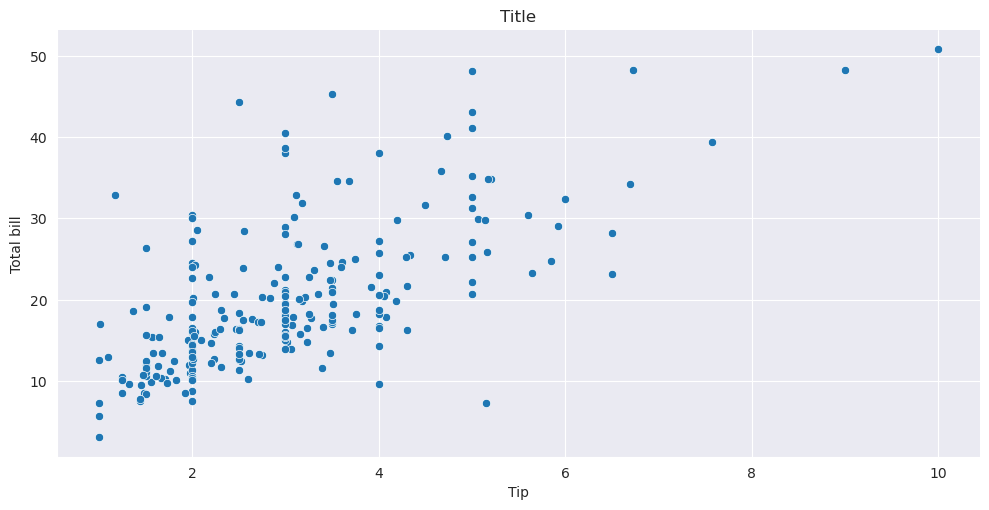

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

# Prepare data
tips = sns.load_dataset("tips")

# Set up aesthetics 
sns.set_style("darkgrid")

# Plot
g = sns.relplot(x="tip", y="total_bill", data=tips, aspect=2) 

# Plot customization
plt.title("Title")
g.set_axis_labels('Tip', 'Total bill');

# Datasets

Seaborn comes with several datasets.

List of available datasets [here](https://github.com/mwaskom/seaborn-data).

We will use three datasets.

## Iris dataset

In [6]:
iris = sns.load_dataset('iris')
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Tips dataset

In [7]:
tips = sns.load_dataset('tips')
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Titanic dataset

In [8]:
titanic = sns.load_dataset('titanic')
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exoplanets dataset

In [9]:
planets = sns.load_dataset('planets')
display(planets.head())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Seaborn aestethics

Styles: white, dark, whitegrid, darkgrid, ticks

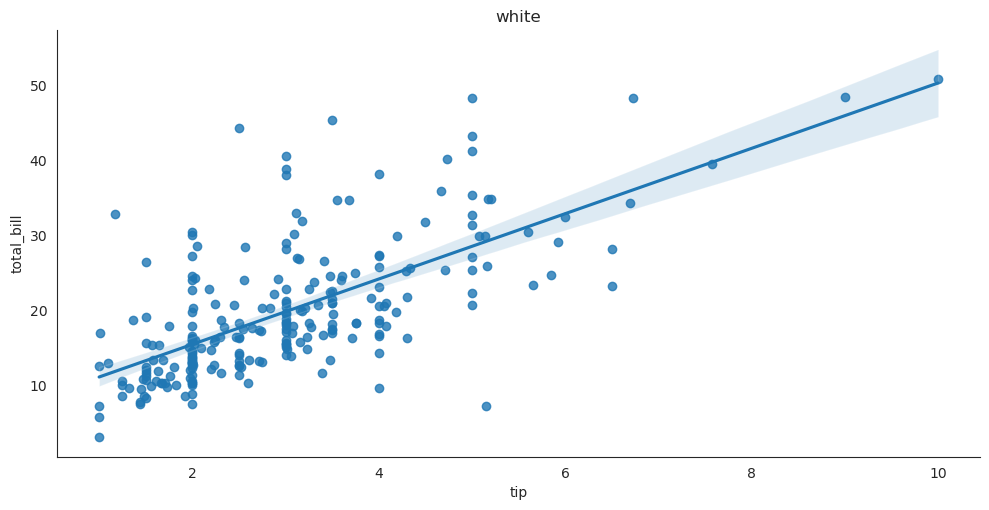

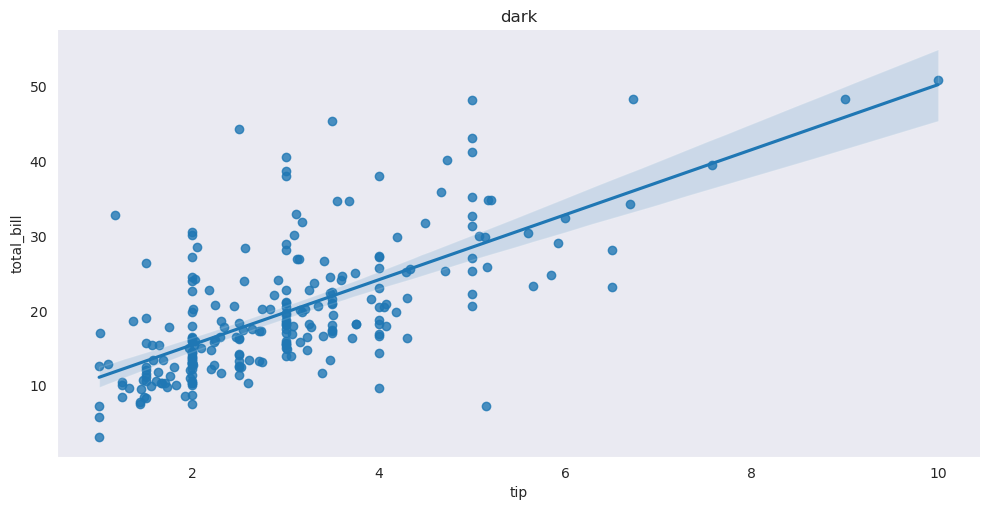

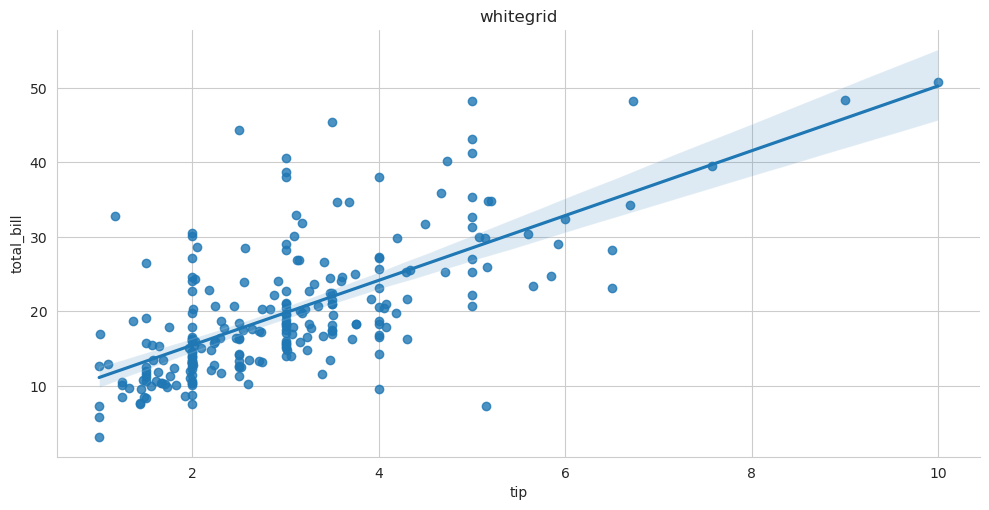

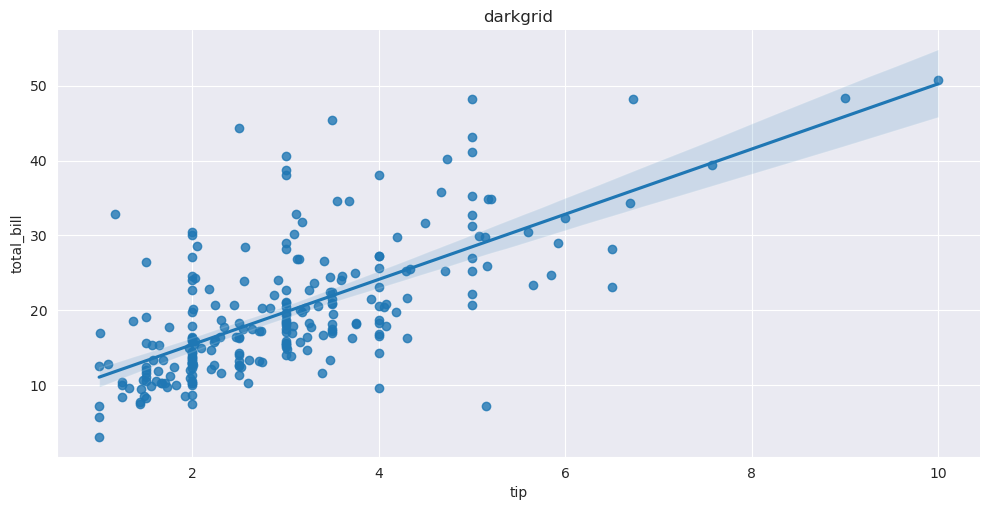

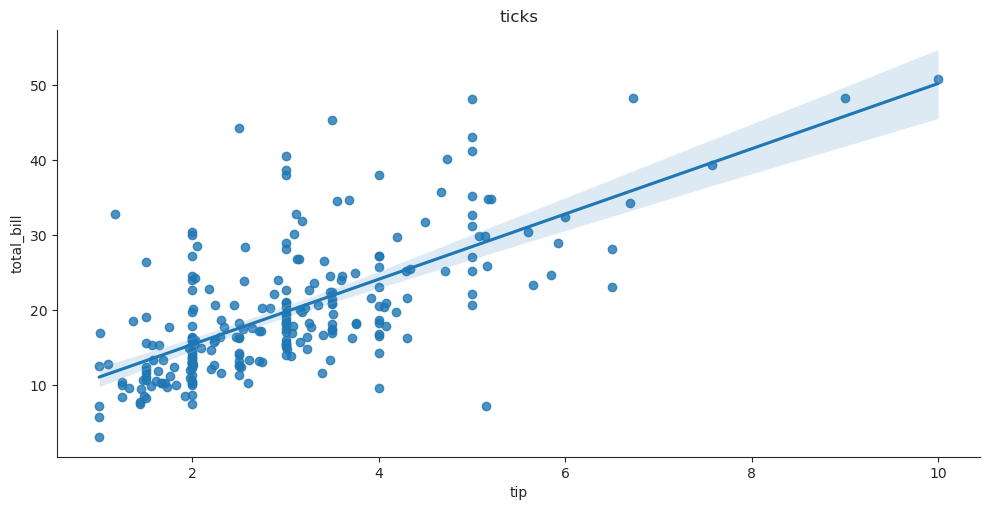

In [10]:
for theme in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(theme)
    sns.lmplot(x="tip",y="total_bill", data=tips, aspect=2)
    plt.title(theme)

# Plot parameters

All Seaborn plots use the same parameters, with a similar expected behaviour, which makes Seaborn quite straitforward to use.

- *x*: Data axis x
- *y*: Data axis Y
- *data*: Dataframe name
- *hue*: Color
- *style*: Style
- *sizes*: Size
- *kind*: Alternate representation

Many plots have specific parameters.

# Univariable plots

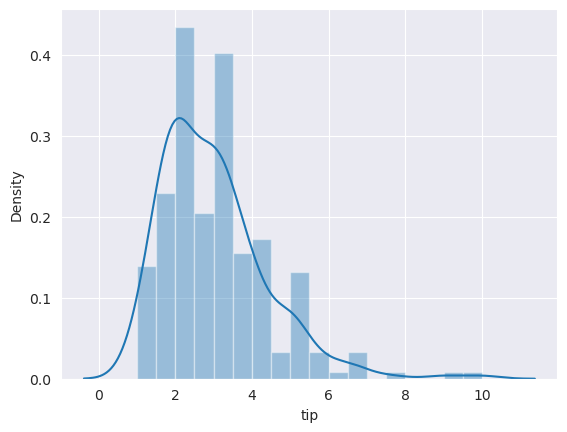

In [11]:
sns.set_style("darkgrid") # Let's leave this theme

sns.distplot(tips['tip']);

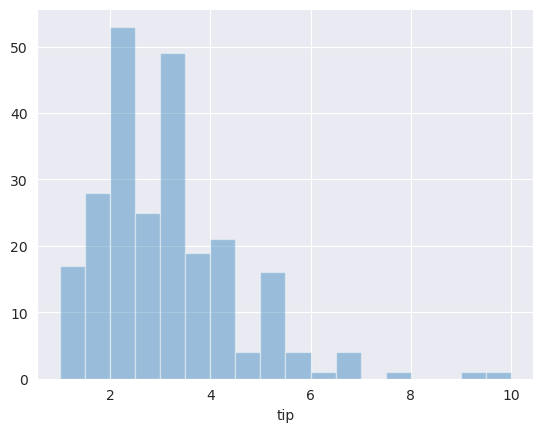

In [12]:
sns.distplot(tips['tip'], kde=False);

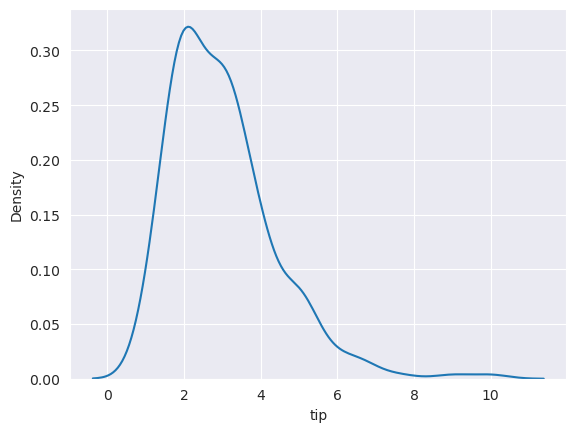

In [13]:
sns.distplot(tips['tip'], hist=False);

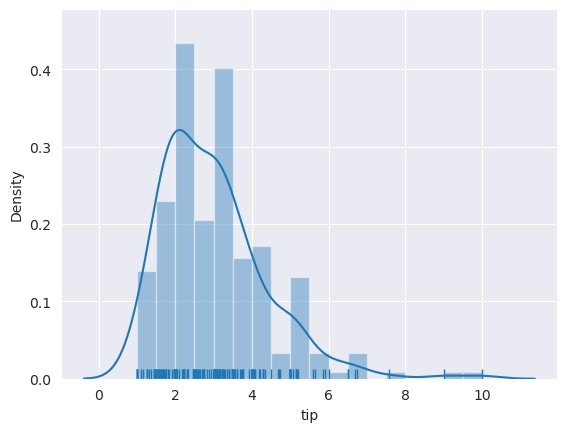

In [14]:
sns.distplot(tips['tip'], rug=True );

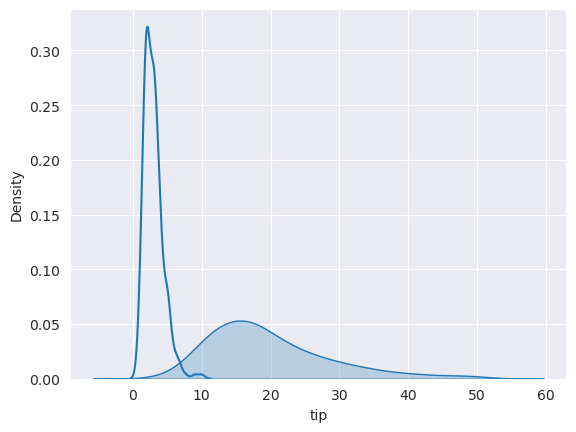

In [15]:
sns.kdeplot(tips['tip'])
sns.kdeplot(tips['total_bill'], shade=True);

distplot() has been remplaced by displot().

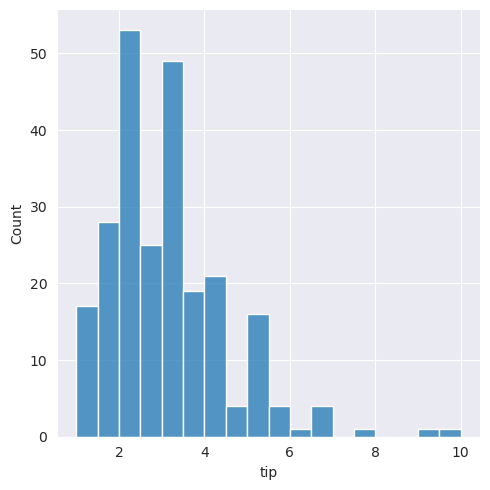

In [16]:
sns.displot(x="tip", data=tips);

# Bidimensional plots

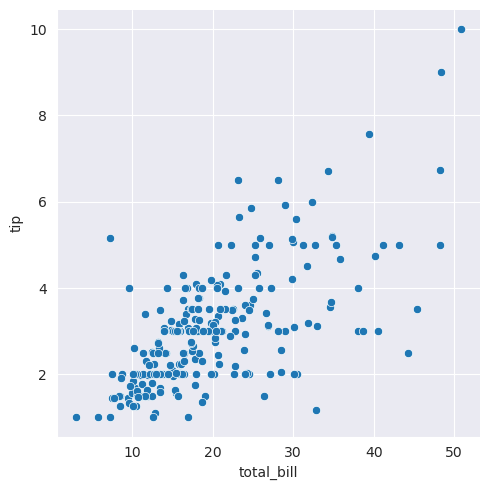

In [17]:
sns.relplot(x="total_bill", y="tip", data=tips);

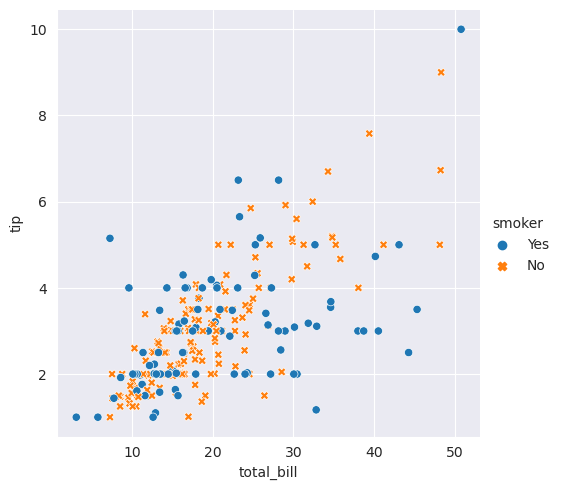

In [18]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

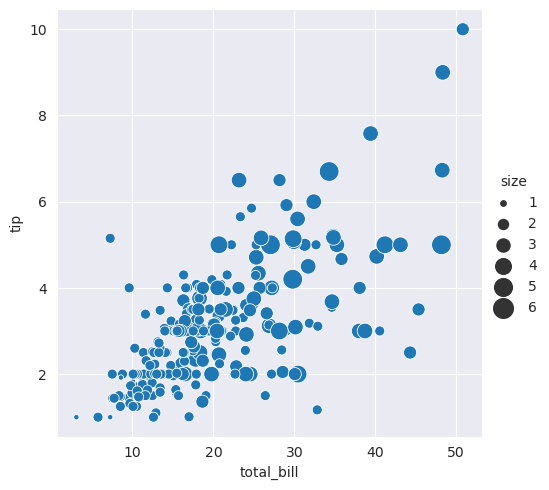

In [19]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

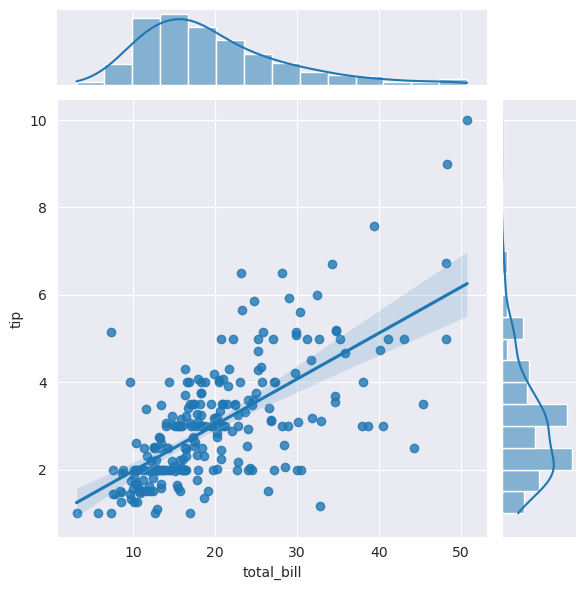

In [20]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

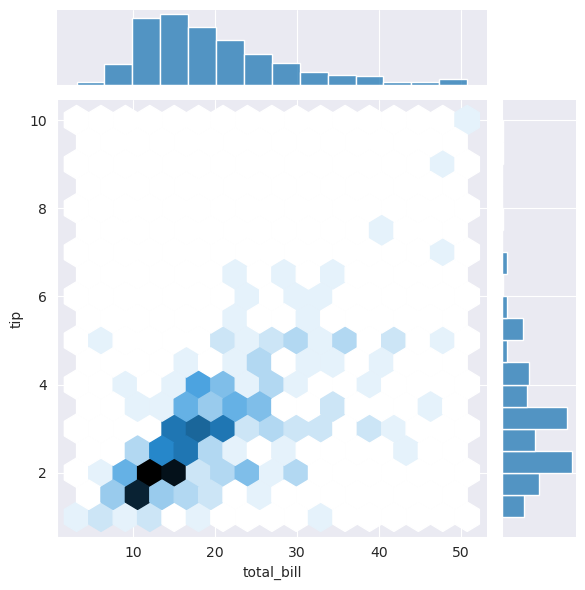

In [21]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex");

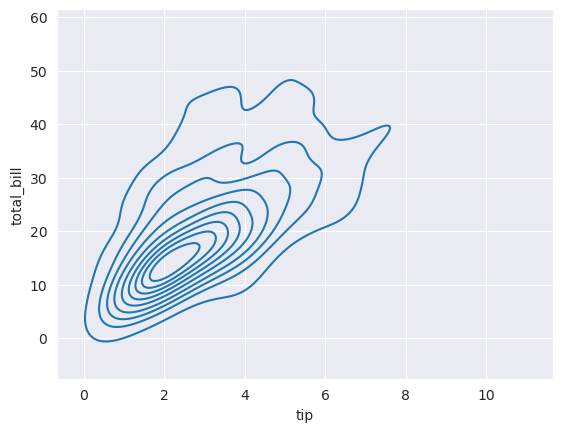

In [22]:
sns.kdeplot(x='tip', y='total_bill', data=tips);

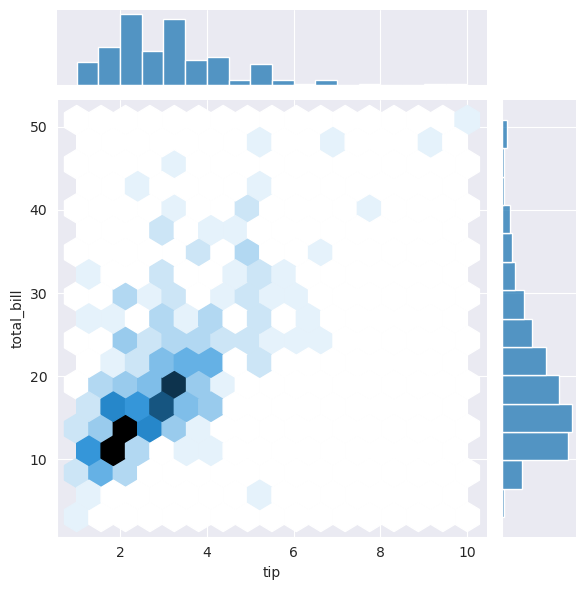

In [23]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind="hex")

# Multivariable plots

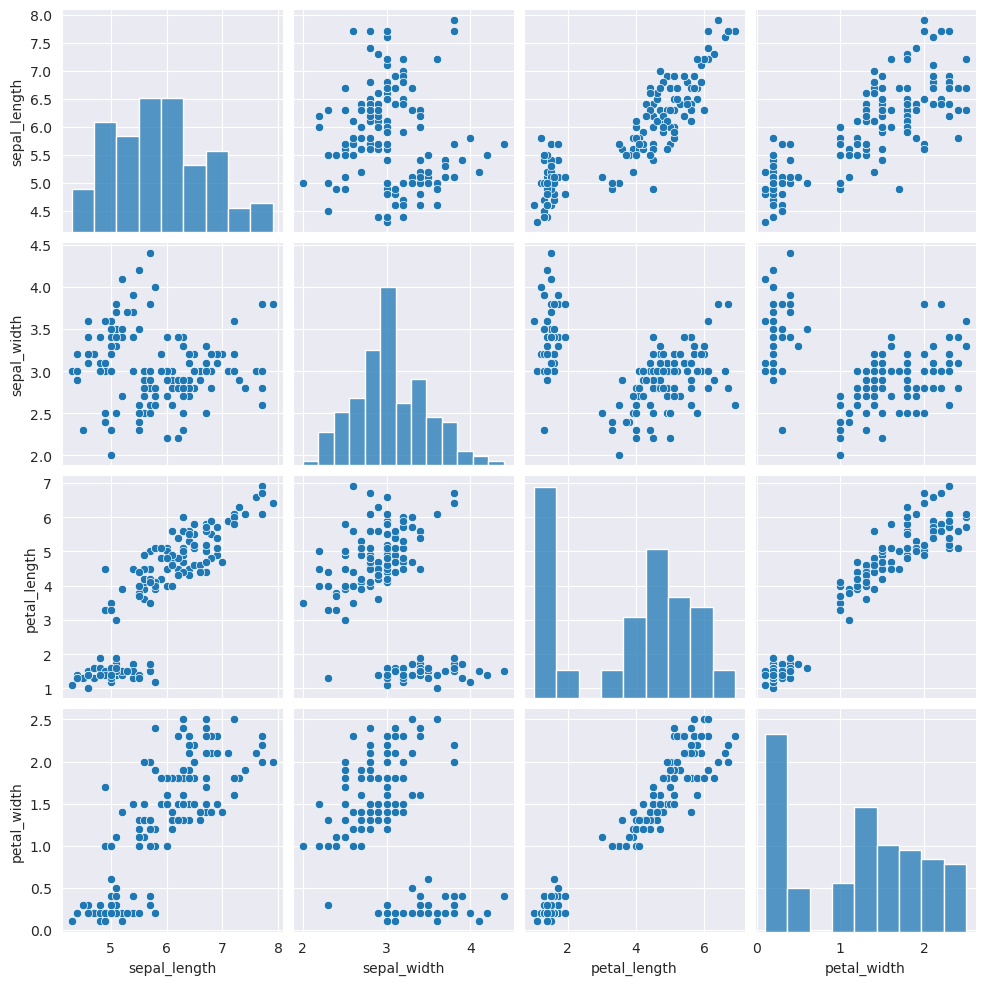

In [24]:
sns.pairplot(data=iris);

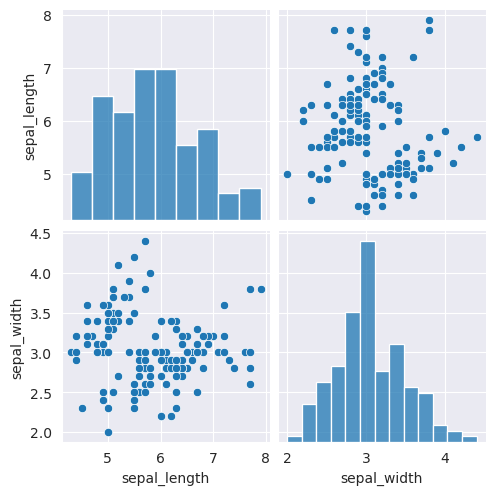

In [25]:
sns.pairplot(data=iris , vars=["sepal_length", "sepal_width"]);

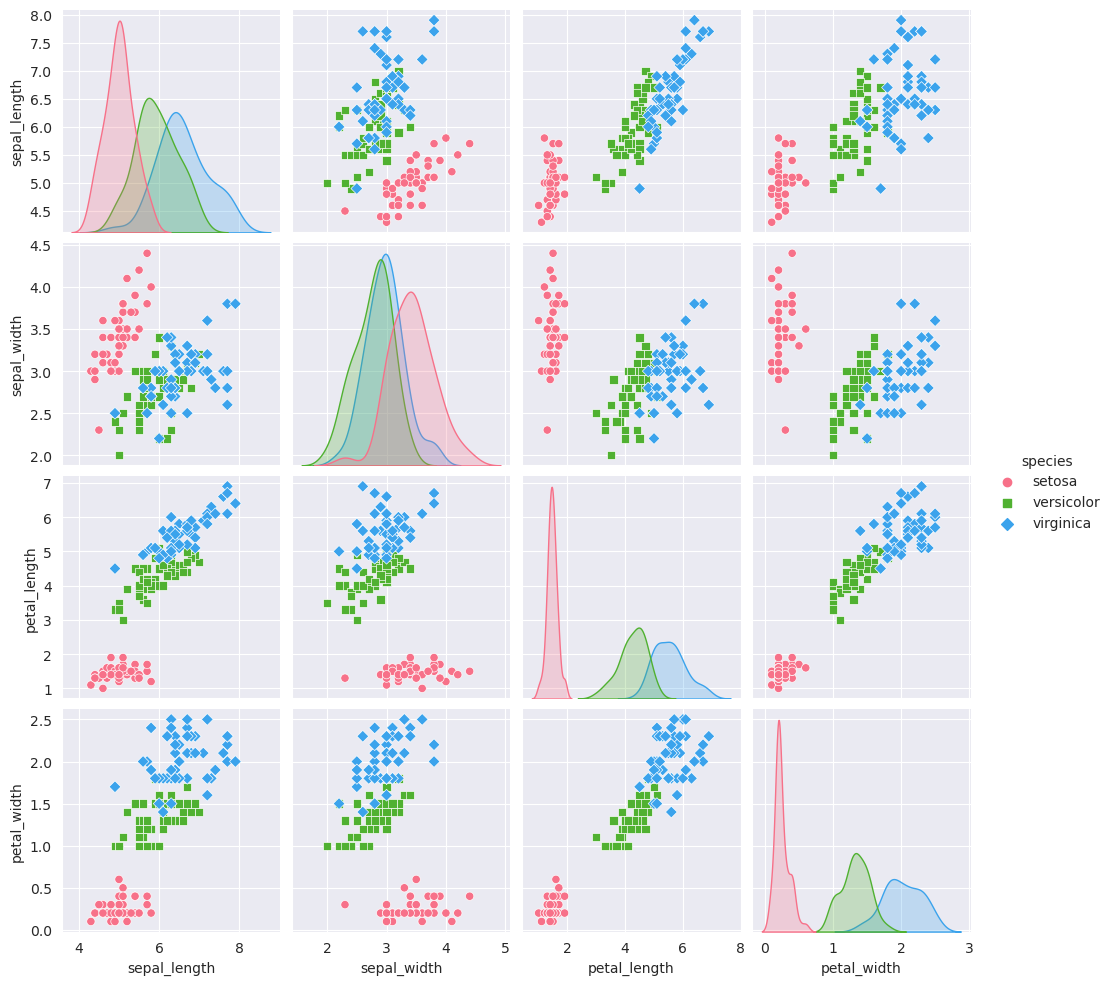

In [26]:
sns.pairplot(data=iris, hue="species", palette="husl", markers=["o", "s", "D"], diag_kind='kde');

# Plotting categorical attributes

## Boxplots

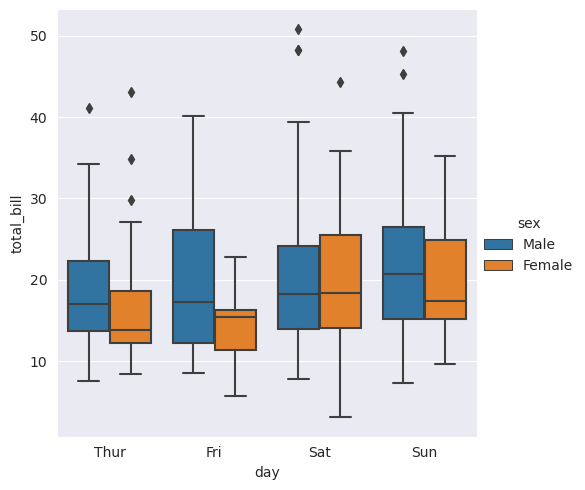

In [27]:
sns.catplot(x="day", y="total_bill", hue="sex", data=tips , kind="box");

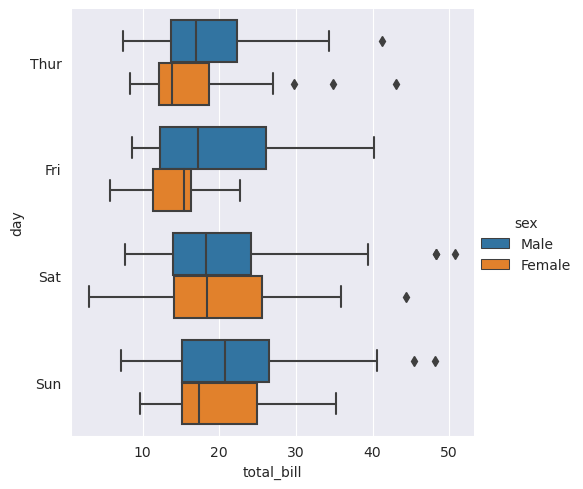

In [28]:
sns.catplot(y="day", x="total_bill", hue="sex", data=tips , kind="box");

## Violin plots

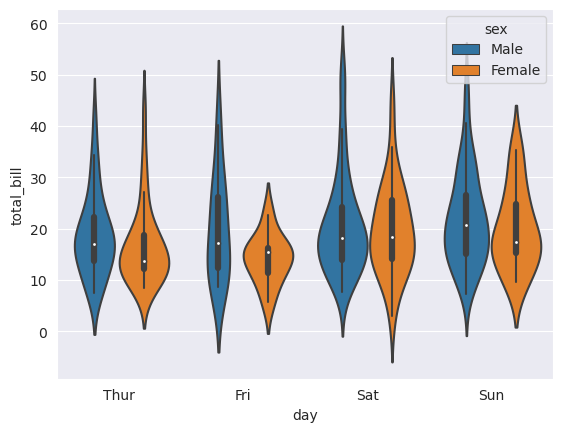

In [29]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips);

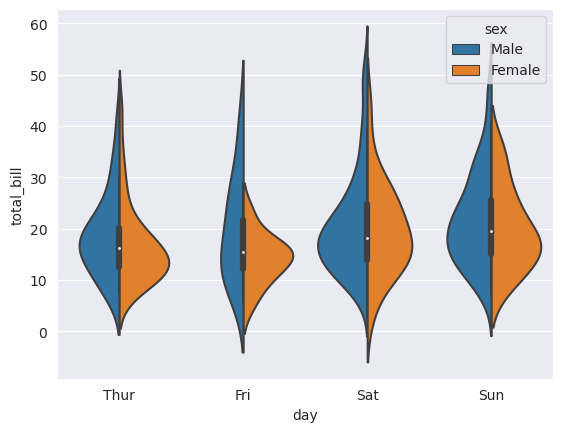

In [30]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips , split=True);

<img src="https://www.explainxkcd.com/wiki/images/c/cb/violin_plots.png" width="300">

## Other plots

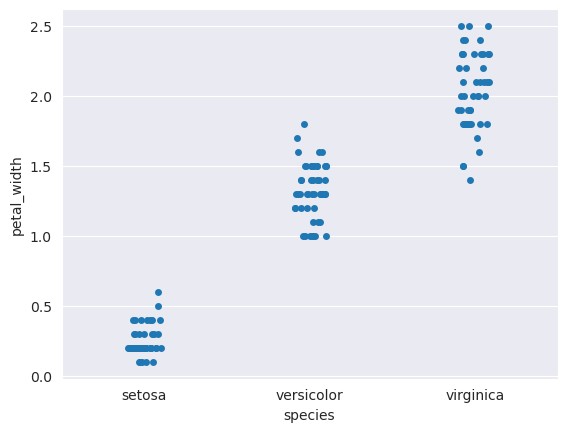

In [31]:
sns.stripplot(x="species", y="petal_width", data=iris);

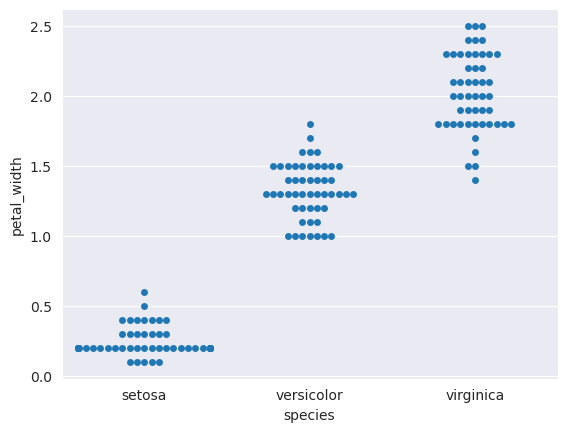

In [32]:
sns.swarmplot(x="species", y="petal_width", data=iris);

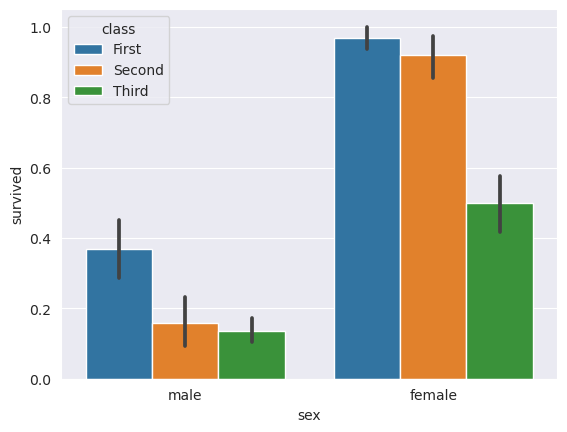

In [33]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

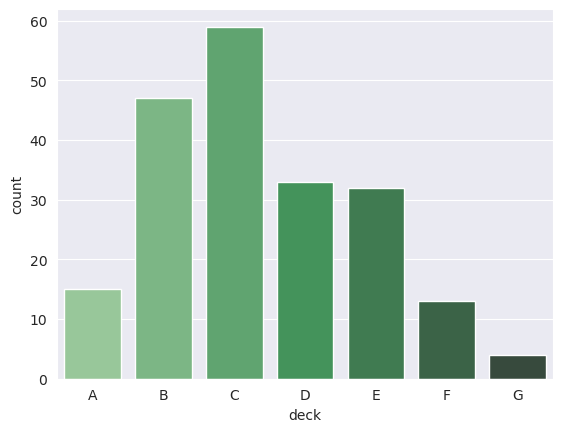

In [34]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

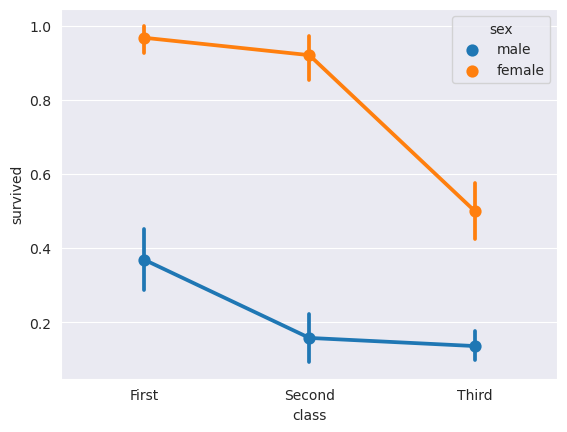

In [35]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic);

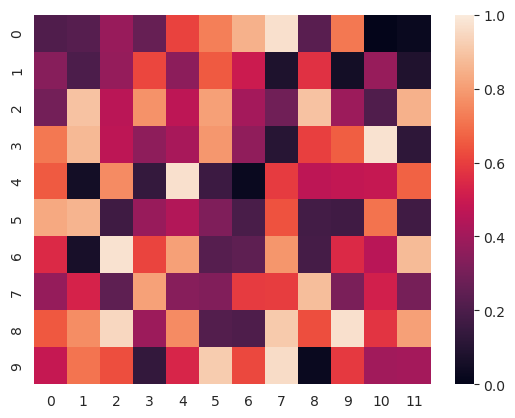

In [36]:
 sns.heatmap(np.random.rand(10, 12),vmin=0, vmax=1) ;

## Plotting continous data

In [37]:
fmri = sns.load_dataset("fmri") 
display(fmri.head())

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


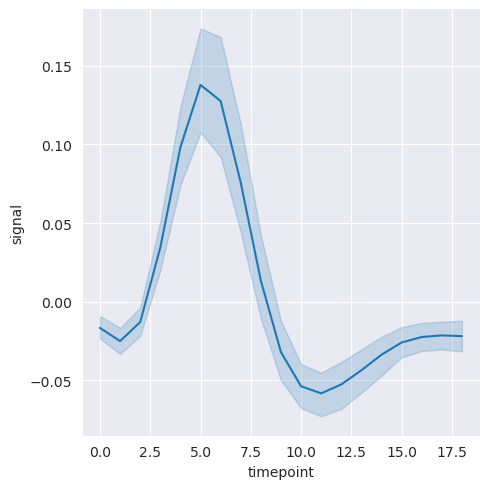

In [38]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

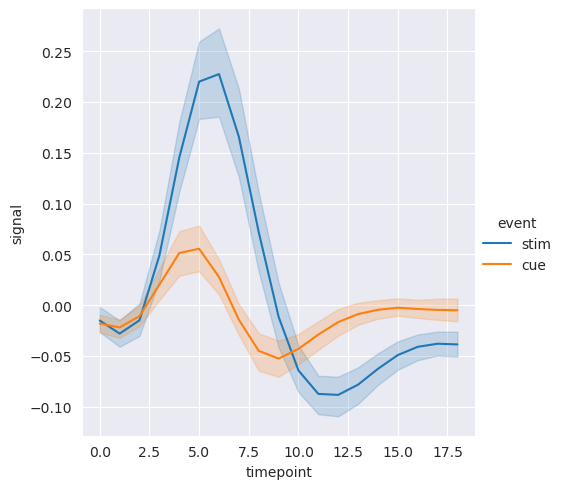

In [39]:
sns.relplot(x="timepoint", y="signal", kind="line", hue="event", data=fmri);

# Comparing several plots

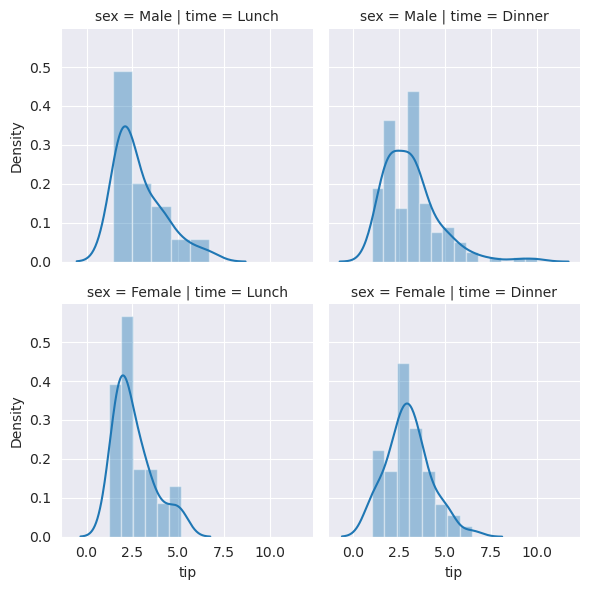

In [40]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.distplot, "tip");

# Customizations

(0.0, 0.8)

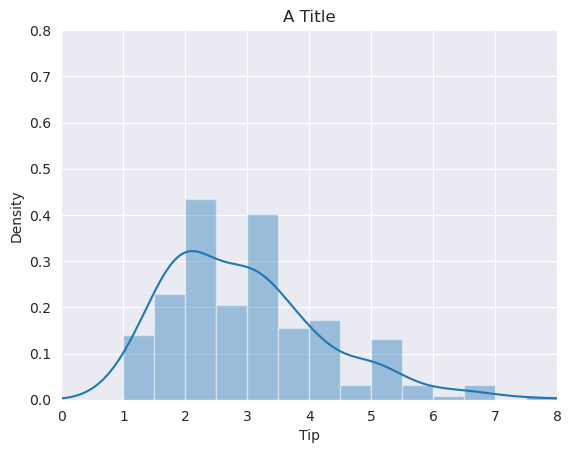

In [41]:
sns.distplot(tips['tip'])
plt.title("A Title")
plt.ylabel("Density")
plt.xlabel("Tip")
plt.xlim(0, 8)
plt.ylim(0, 0.8)

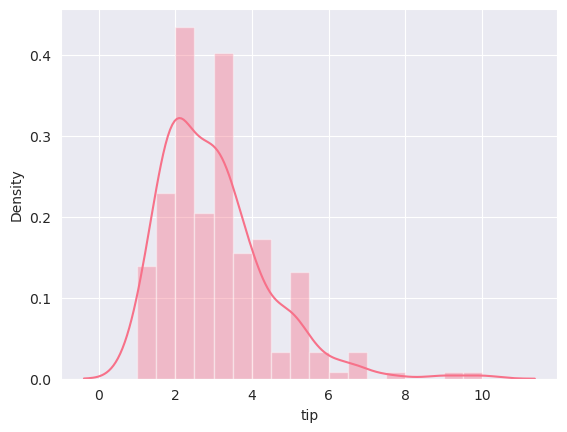

In [42]:
sns.set_palette("husl",3)
sns.distplot(tips['tip']);

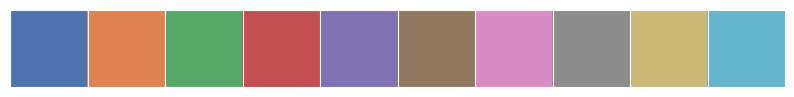

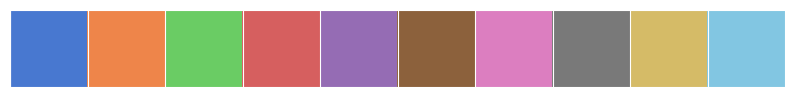

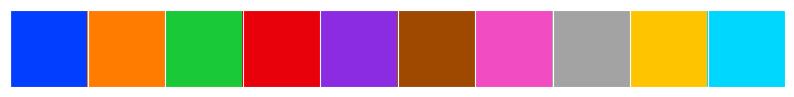

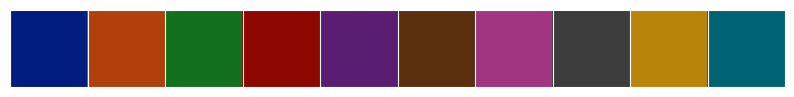

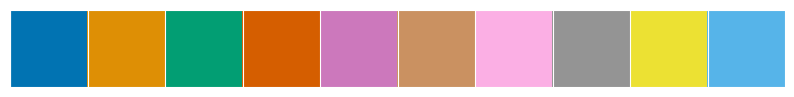

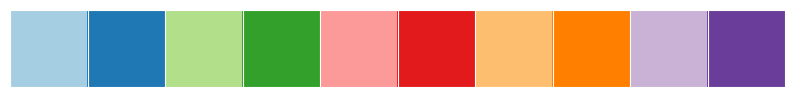

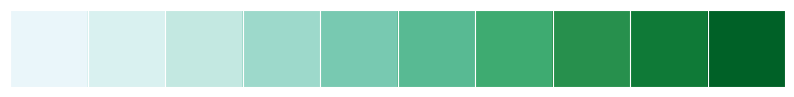

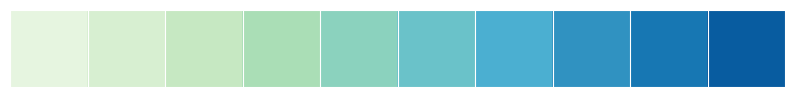

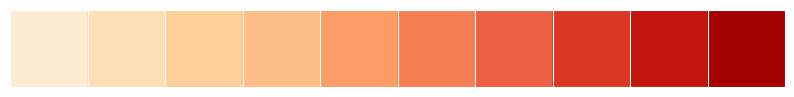

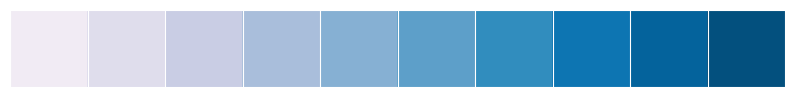

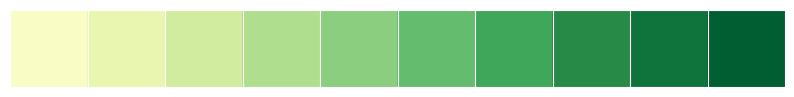

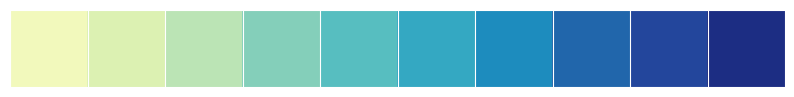

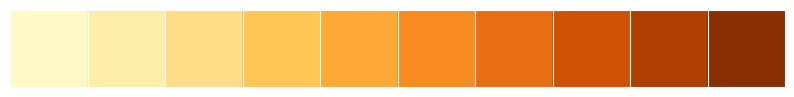

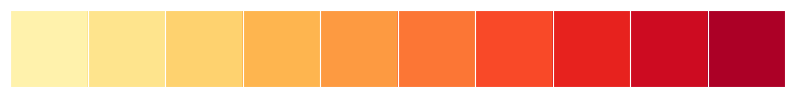

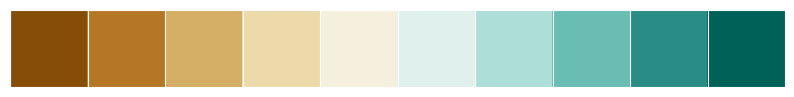

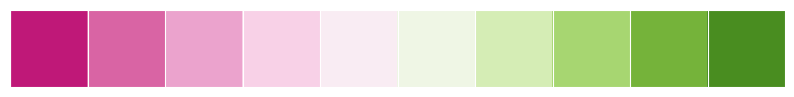

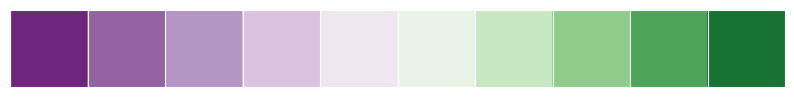

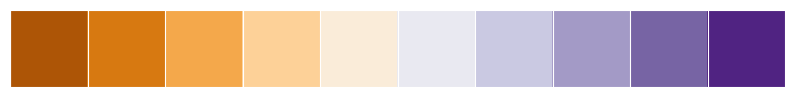

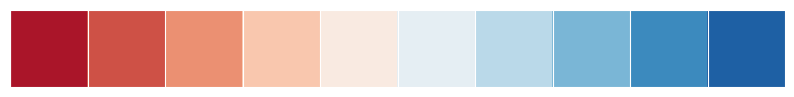

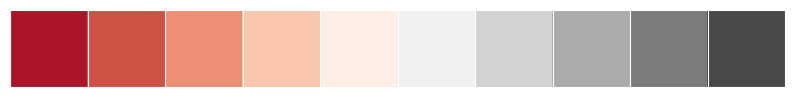

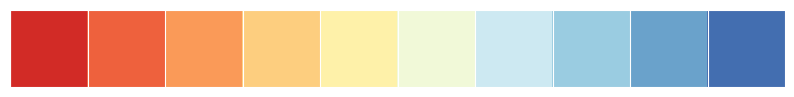

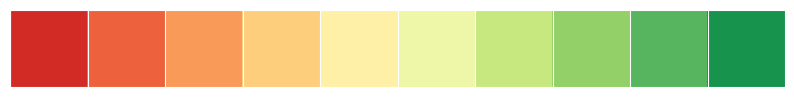

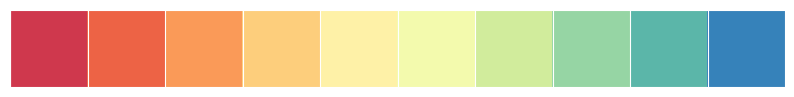

In [43]:
plt.rcParams.update({'figure.max_open_warning': 0}) # Avoid warning, not relevant

sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("muted", 10))
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))
sns.palplot(sns.color_palette("colorblind", 10))
sns.palplot(sns.color_palette("Paired", 10))
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("GnBu", 10))
sns.palplot(sns.color_palette("OrRd", 10))
sns.palplot(sns.color_palette("PuBu", 10))
sns.palplot(sns.color_palette("YlGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
sns.palplot(sns.color_palette("YlOrBr", 10))
sns.palplot(sns.color_palette("YlOrRd", 10))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("PiYG", 10))
sns.palplot(sns.color_palette("PRGn", 10))
sns.palplot(sns.color_palette("PuOr", 10))
sns.palplot(sns.color_palette("RdBu", 10))
sns.palplot(sns.color_palette("RdGy", 10))
sns.palplot(sns.color_palette("RdYlBu", 10))
sns.palplot(sns.color_palette("RdYlGn", 10))
sns.palplot(sns.color_palette("Spectral", 10))

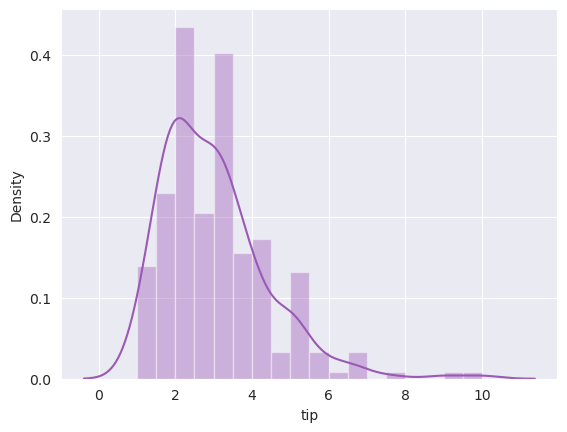

In [47]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 
sns.distplot(tips['tip']);

# Final remarks

In [45]:
plt.show() # Show pic in script and event loop

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.savefig("mypic.png") # Save plot
plt.savefig("mypic.png", transparent=True) # Save plot

Supported file formats:

In [46]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

<Figure size 640x480 with 0 Axes>